In [1]:
import pandas as pd
df=pd.read_csv("bangalore_house_price.csv")
df

,location,size,total_sqft,bath,price,price_per_square_foot
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,3700
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4615
2,Uttarahalli,3 BHK,1440,2.0,62.00,4306
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,6246
4,Kothanur,2 BHK,1200,2.0,51.00,4250
...,...,...,...,...,...,...
13078,Whitefield,5 Bedroom,3453,4.0,231.00,6690
13079,Richards Town,4 BHK,3600,5.0,400.00,11111
13080,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,5259
13081,Padmanabhanagar,4 BHK,4689,4.0,488.00,10407


In [2]:
df=df[df['price_per_square_foot']!="#VALUE!"]

In [11]:
df.price_per_square_foot=df.price_per_square_foot.astype(str).astype(int)
df

C:\Users\ramya\AppData\Local\Temp\ipykernel_27212\3681875620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.price_per_square_foot=df.price_per_square_foot.astype(str).astype(int)


,location,size,total_sqft,bath,price,price_per_square_foot
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,3700
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4615
2,Uttarahalli,3 BHK,1440,2.0,62.00,4306
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,6246
4,Kothanur,2 BHK,1200,2.0,51.00,4250
...,...,...,...,...,...,...
13078,Whitefield,5 Bedroom,3453,4.0,231.00,6690
13079,Richards Town,4 BHK,3600,5.0,400.00,11111
13080,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,5259
13081,Padmanabhanagar,4 BHK,4689,4.0,488.00,10407


## plot histogram to see how is the data distribution

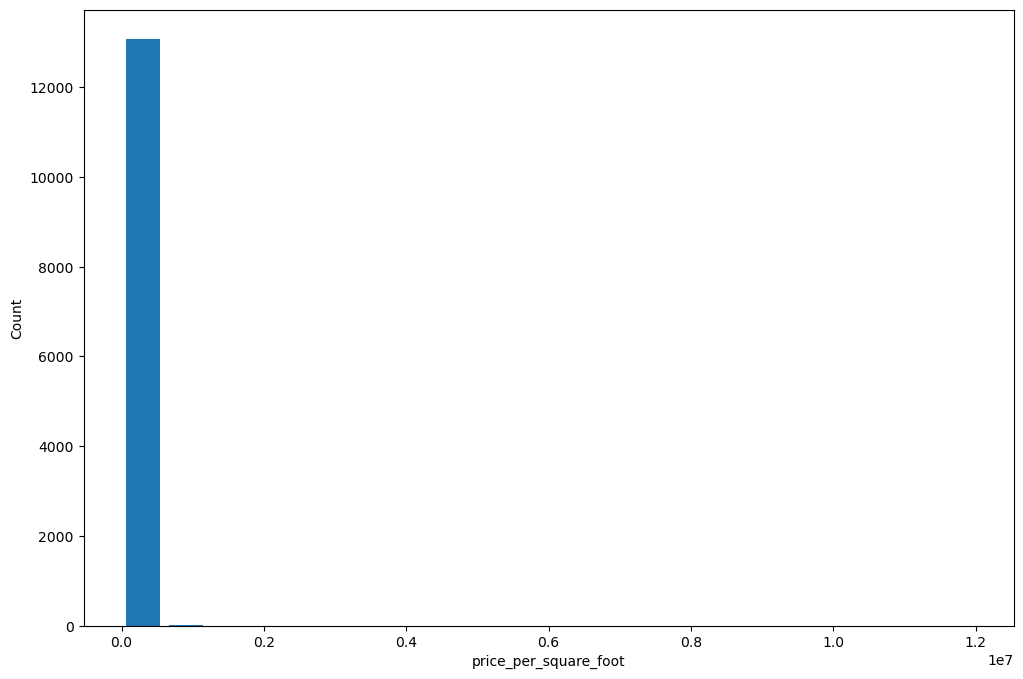

In [44]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
plt.hist(df.price_per_square_foot, bins=20, rwidth=0.8)
plt.xlabel('price_per_square_foot')
plt.ylabel('Count')
plt.show()

#### Above chart confirms our understanding that this dataset has some bad outliers. Because we see only one bar with more than 12000 data points but on the right hand side there are data points that have higher value for price per sqft but count of these data points is very tiny compared to 12000 hence we can hardly see any bar Using log scale can make visualization little better

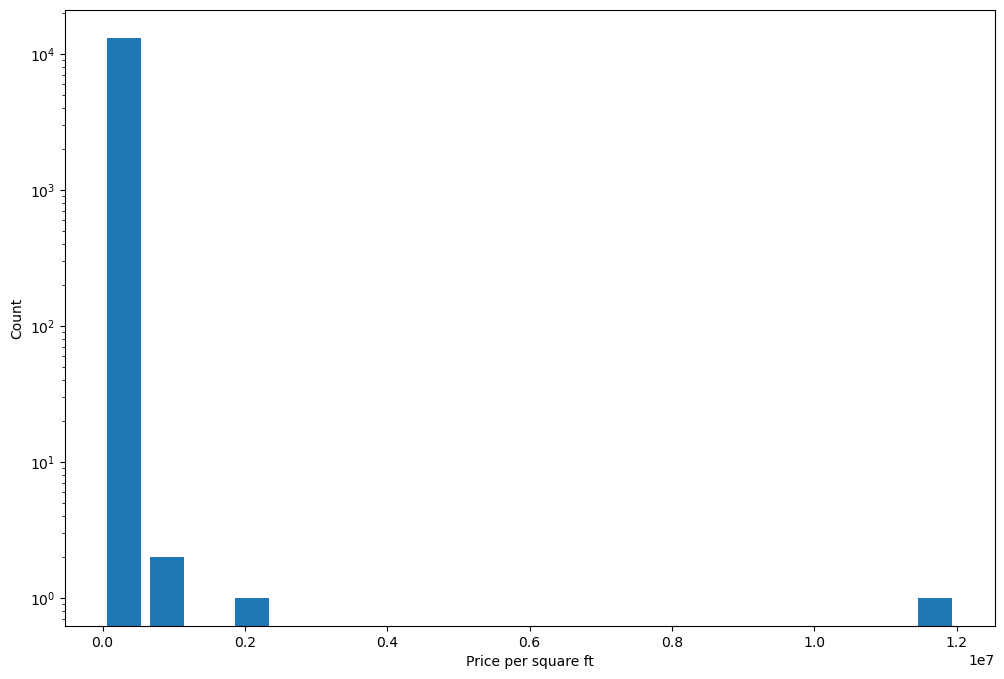

In [46]:
plt.hist(df.price_per_square_foot, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

## Remove outliers using percentile

In [12]:
min_limit,max_limit=df.price_per_square_foot.quantile([0.01,0.99])

In [16]:
df2=df[(df.price_per_square_foot>min_limit)&(df.price_per_square_foot<max_limit)]

In [18]:
df2.shape

(12782, 6)

In [20]:
df.shape

(13078, 6)

In [23]:
outliers_removed = df.shape[0]-df2.shape[0]
print("The outliers removed using Percentile is",outliers_removed)

The outliers removed using Percentile is 296


## Remove outliers using 4 standard deviation

In [27]:
upper_limit=(df2.price_per_square_foot.mean())+(4*df2.price_per_square_foot.std())

lower_limit=(df2.price_per_square_foot.mean())-(4*df2.price_per_square_foot.std())


In [28]:
upper_limit

20605.25961259332

In [29]:
lower_limit

-7554.9031738513395

In [32]:
df3=df2[(df2.price_per_square_foot>lower_limit)&(df2.price_per_square_foot<upper_limit)]
df3.shape

(12693, 6)

In [35]:
outliers_removed=df2.shape[0]-df3.shape[0]
print("The number of rows removed as outliers is",outliers_removed)

The number of rows removed as outliers is 89


### Plot histogram after removing outliers using percentile and 4 standard deviation

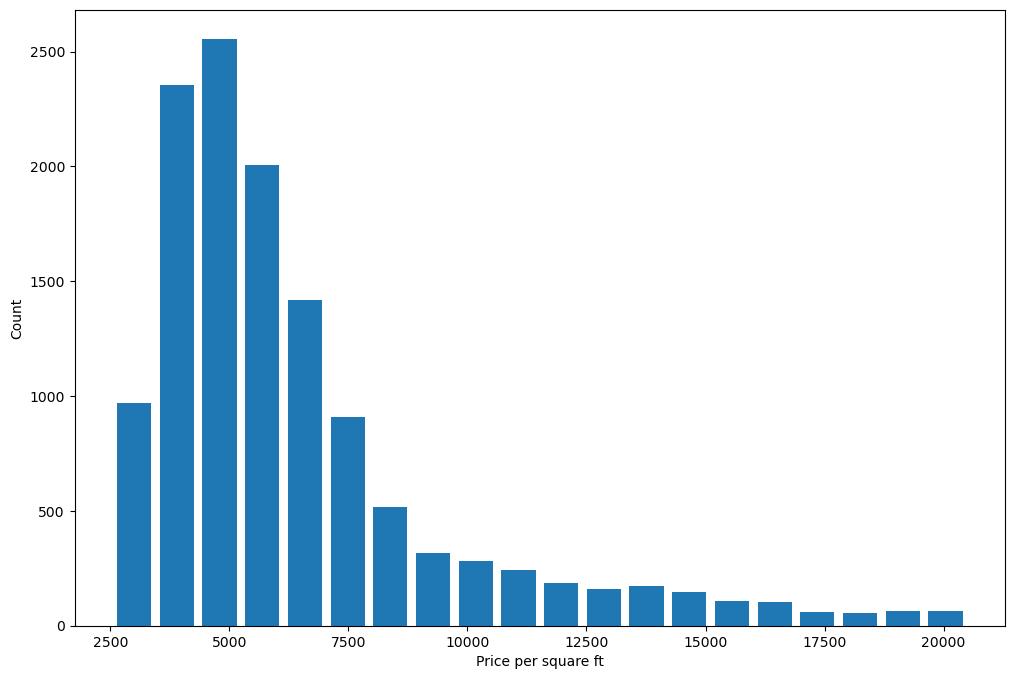

In [47]:
plt.hist(df3.price_per_square_foot, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

## Draw bell curve

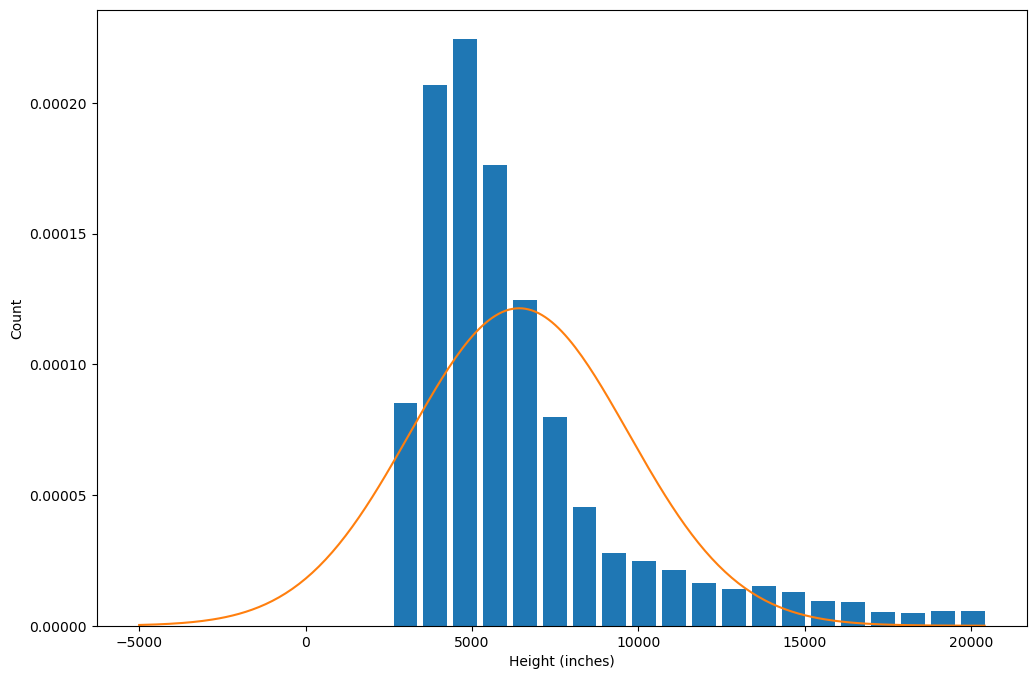

In [48]:
from scipy.stats import norm
import numpy as np

plt.hist(df3.price_per_square_foot, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df3.price_per_square_foot.max(), 100)
plt.plot(rng, norm.pdf(rng,df3.price_per_square_foot.mean(),df3.price_per_square_foot.std()))

## Remove outliers using Zscore

In [37]:
df3['zscore']=(df3.price_per_square_foot-df3.price_per_square_foot.mean())/df3.price_per_square_foot.std()

C:\Users\ramya\AppData\Local\Temp\ipykernel_27212\2656615549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['zscore']=(df3.price_per_square_foot-df3.price_per_square_foot.mean())/df3.price_per_square_foot.std()


In [38]:
df3.sample(10)

,location,size,total_sqft,bath,price,price_per_square_foot,zscore
4131,Old Madras Road,2 BHK,1171,2.0,75.00,6405,-0.003635
8653,Sector 1 HSR Layout,3 BHK,1720,3.0,83.00,4826,-0.484366
9727,KR Layout,1 BHK,1050,2.0,41.00,3905,-0.764767
9526,Whitefield,2 BHK,1216,2.0,73.00,6003,-0.126025
9494,Thanisandra,1 BHK,662,1.0,38.00,5740,-0.206096
6340,Rayasandra,3 BHK,1555,3.0,75.17,4834,-0.481930
6236,Banashankari Stage II,4 Bedroom,1050,3.0,125.00,11905,1.670855
9459,Laggere,5 Bedroom,1800,5.0,70.00,3889,-0.769638
12401,Dasappa Layout,7 Bedroom,1500,7.0,130.00,8667,0.685037
12311,Thanisandra,3 BHK,1430,2.0,56.00,3916,-0.761418


In [40]:
df4=df3[(df3.zscore>-4)&(df3.zscore<4)]
df4.shape

(12623, 7)

In [41]:
outliers_removed= df3.shape[0]-df4.shape[0]
print("the number of rows removed as an outlier using Zscore is",outliers_removed)

the number of rows removed as an outlier using Zscore is 70


In [42]:
df4.sample(10)

,location,size,total_sqft,bath,price,price_per_square_foot,zscore
1073,Jalahalli East,3 BHK,1260,2.0,60.0,4762,-0.503851
11882,Hoodi,3 BHK,2144,3.0,140.0,6530,0.034422
6769,Electronic City,4 BHK,2093,4.0,104.0,4969,-0.440829
1562,Hebbal,4 BHK,2483,5.0,215.0,8659,0.682602
2489,Subramanyapura,2 BHK,1313,2.0,73.0,5560,-0.260897
12464,Tirumanahalli,2 BHK,1260,2.0,55.0,4365,-0.624718
1101,Budigere,2 BHK,1162,2.0,57.0,4905,-0.460314
3937,Yelachenahalli,5 Bedroom,897,2.0,85.0,9476,0.931340
9707,Yelahanka,2 BHK,1270,2.0,57.0,4488,-0.587271
6975,EPIP Zone,3 BHK,1709,3.0,80.0,4681,-0.528511


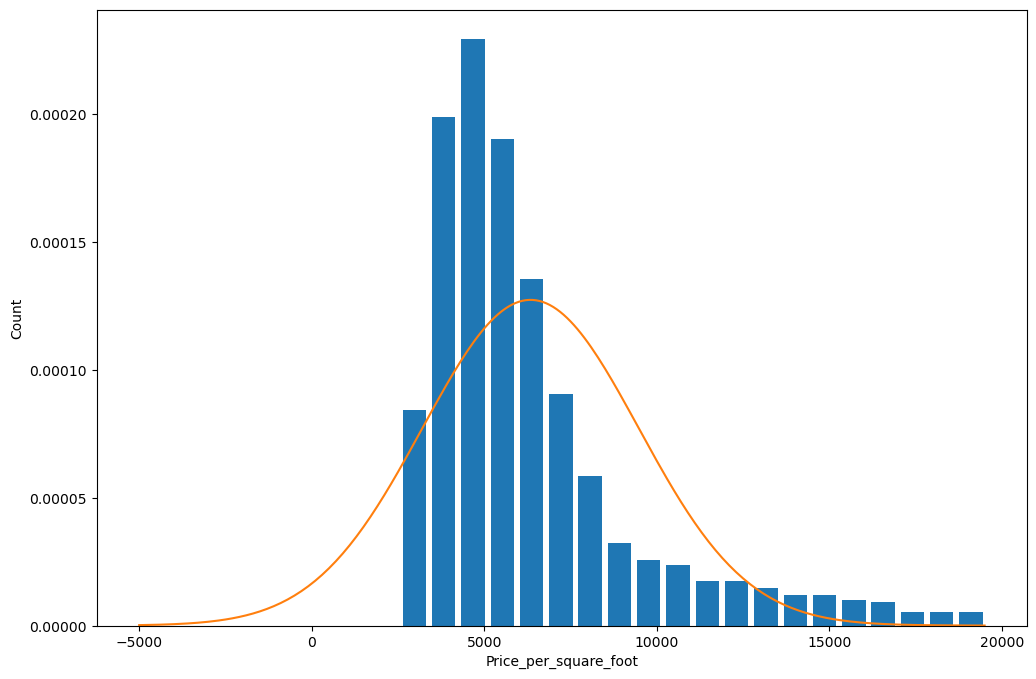

In [50]:


plt.hist(df4.price_per_square_foot, bins=20, rwidth=0.8, density=True)
plt.xlabel('Price_per_square_foot')
plt.ylabel('Count')

rng = np.arange(-5000, df4.price_per_square_foot.max(), 100)
plt.plot(rng, norm.pdf(rng,df4.price_per_square_foot.mean(),df4.price_per_square_foot.std()))
